In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dfX = pd.read_csv('./data/ex4x.dat', delim_whitespace = True, names = ["exam1", "exam2"])
dfY = pd.read_csv('./data/ex4y.dat', names = ['label'])
dfXcpy = dfX.copy()
dfXcpy['label'] = dfY['label']


In [21]:
dfX.insert(0, 'bias', 1)
matrixX = dfX.as_matrix()

matrixY = dfY.as_matrix()
m = len(dfX.index)

In [22]:
theta = np.zeros(3)
theta = np.reshape(theta, (3, 1))

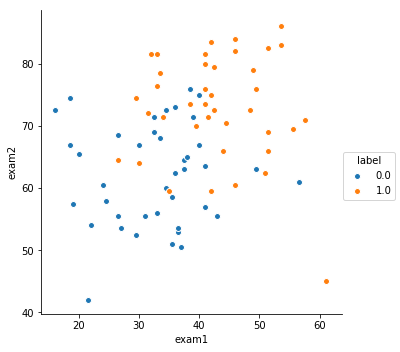

In [23]:
sns.pairplot(x_vars=["exam1"], y_vars=["exam2"], data=dfXcpy, hue="label", size=5)

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [25]:
max_iter = 7 # maximum allowed iterations

for i in range(max_iter):
    z = np.dot(matrixX, theta)
    h = (sigmoid(z))
    
    # gradient element
    sodot = h - matrixY
    gradient = np.dot(matrixX.transpose(), sodot) / m
    
    
    # hessian element
    bodot = np.dot(np.diag(h), np.diag((1 - h)))
    codot = np.dot(matrixX.transpose(), bodot)
    hessian = np.dot(codot, matrixX) / m
    hessian = np.linalg.inv(hessian)

    theta = theta - np.dot(hessian, gradient)

In [26]:
print (theta)
w1 = theta[0][0]
w2 = theta[1][0]
w3 = theta[2][0]

[[-16.37058223]
 [  0.14870783]
 [  0.15846535]]


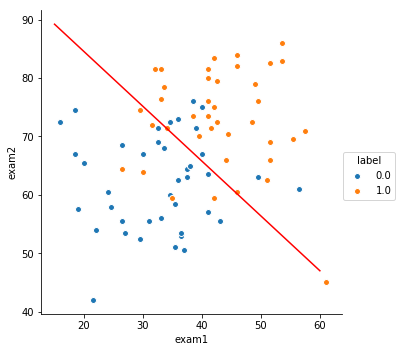

In [27]:
# plotting decision boundary
ex1 = np.linspace(15, 60, 80)
ex2 = (-w1/w3)+(-w2/w3)*ex1
sns.pairplot(x_vars=["exam1"], y_vars=["exam2"], data=dfXcpy, hue="label", size=5)
plt.plot(ex1, ex2, color='r', label='decision boundary');